# Get data of heart diase

In [248]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Lấy data và tiền xử lý

In [249]:
df = pd.read_csv("datasets/heart_disease.csv")
df = df.drop(columns=["Education", "Income", "AnyHealthcare", "NoDocbcCost"])


## Các thuộc tính của dataset

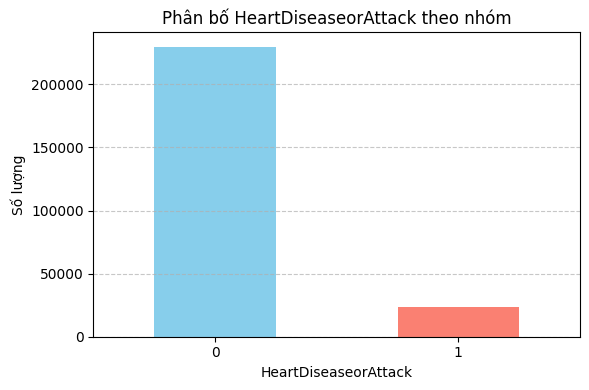

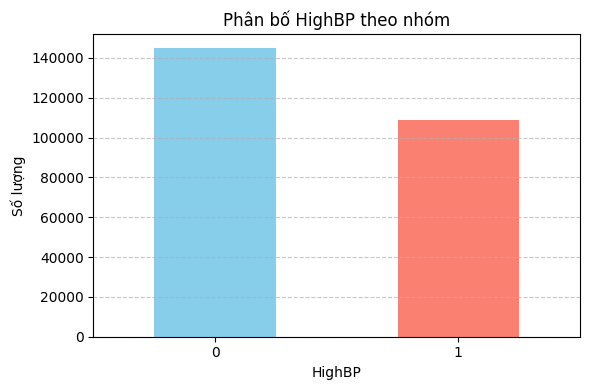

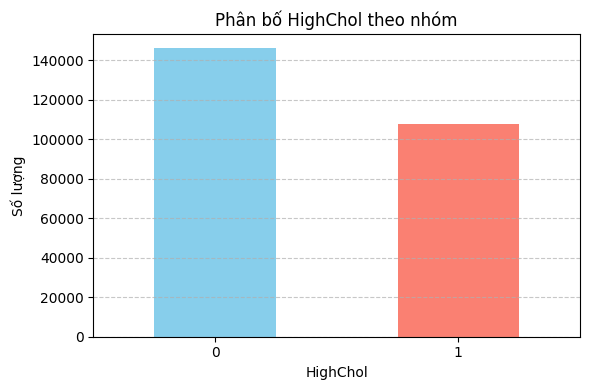

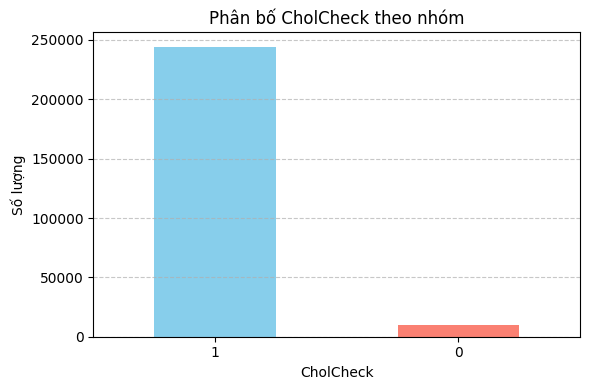

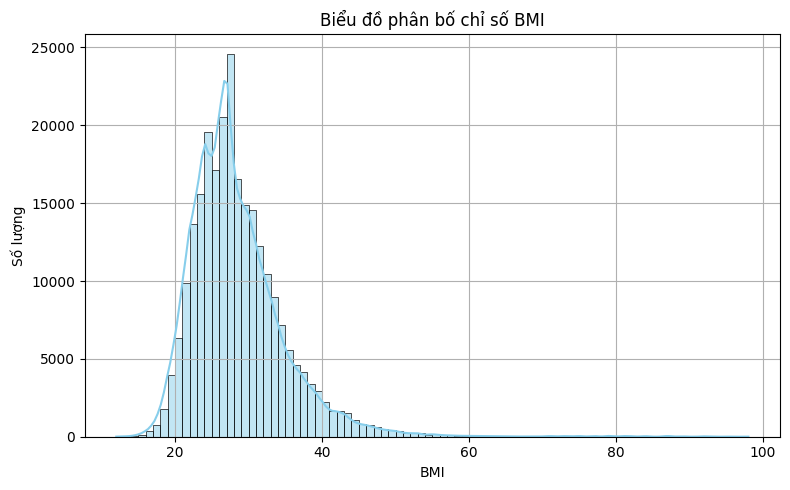

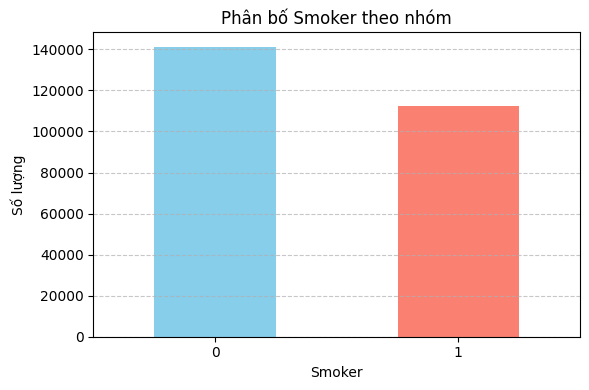

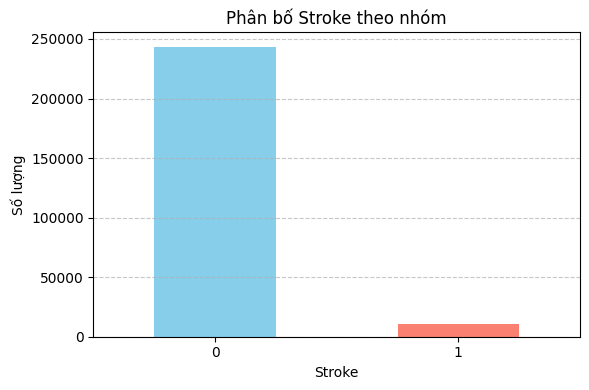

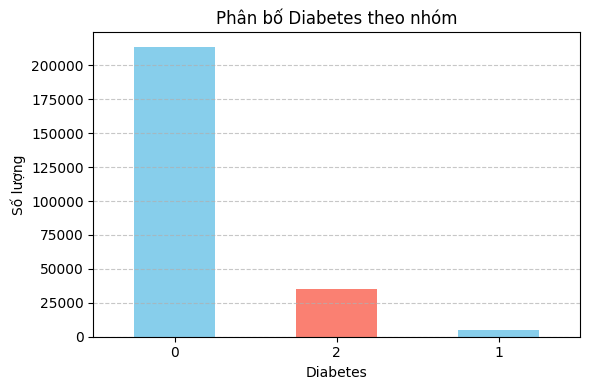

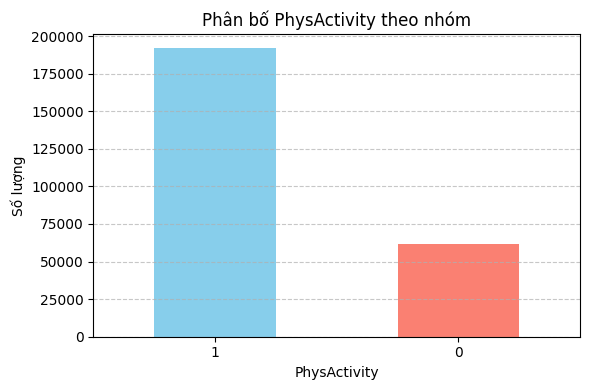

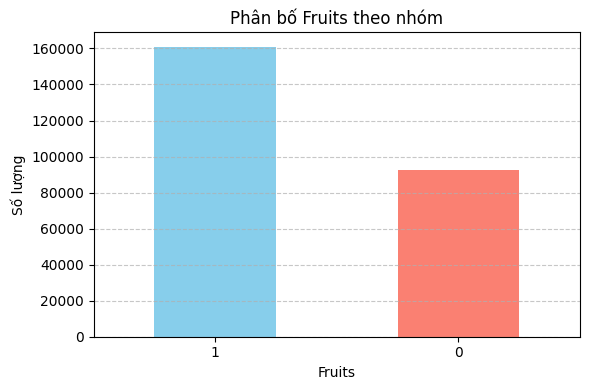

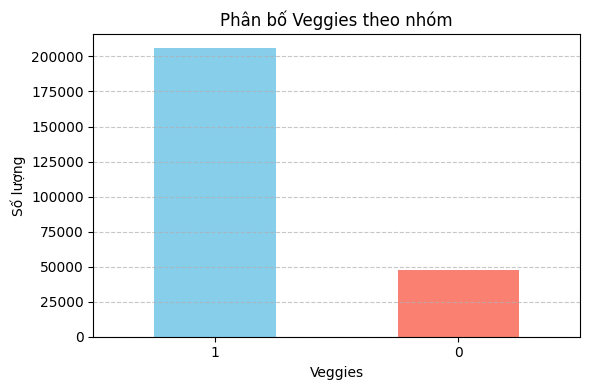

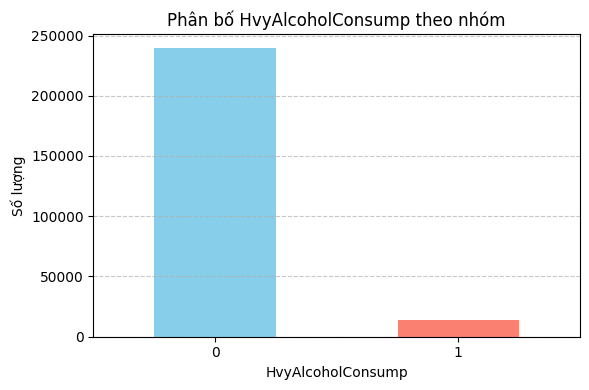

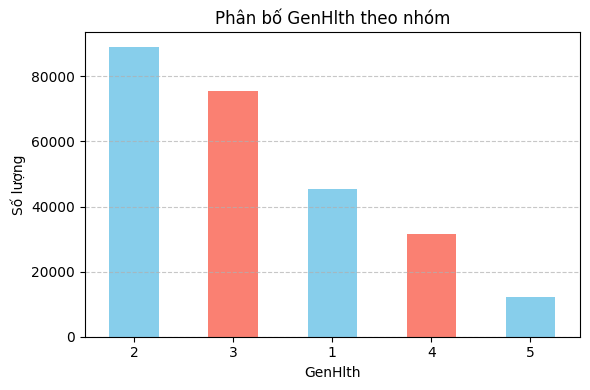

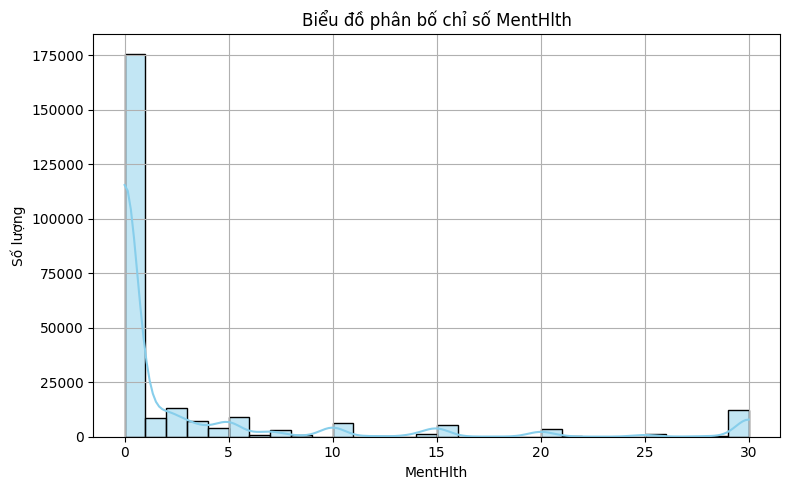

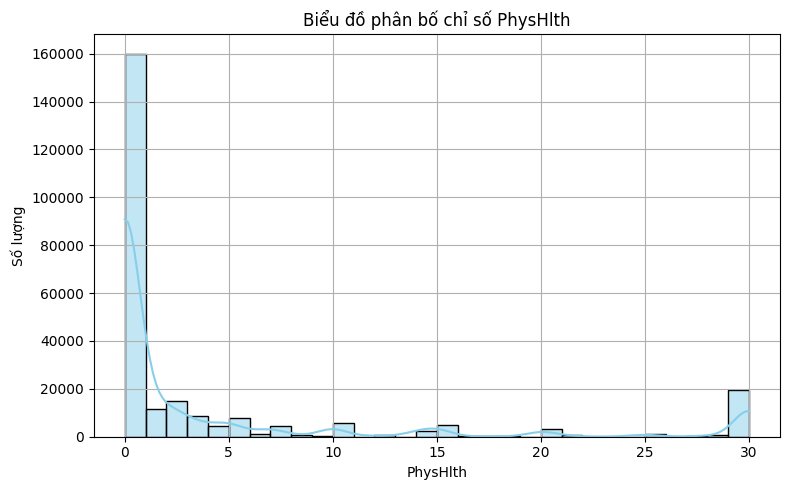

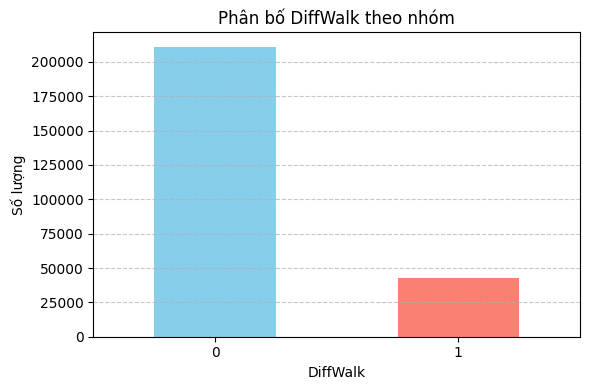

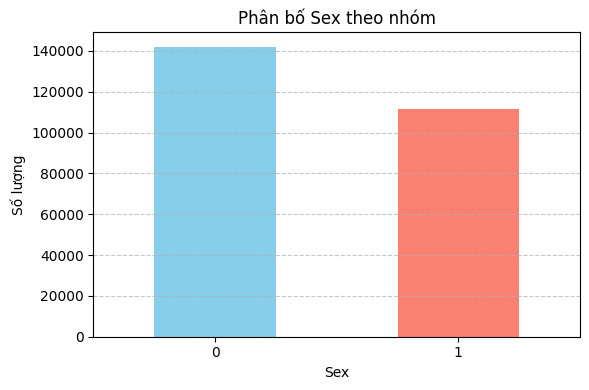

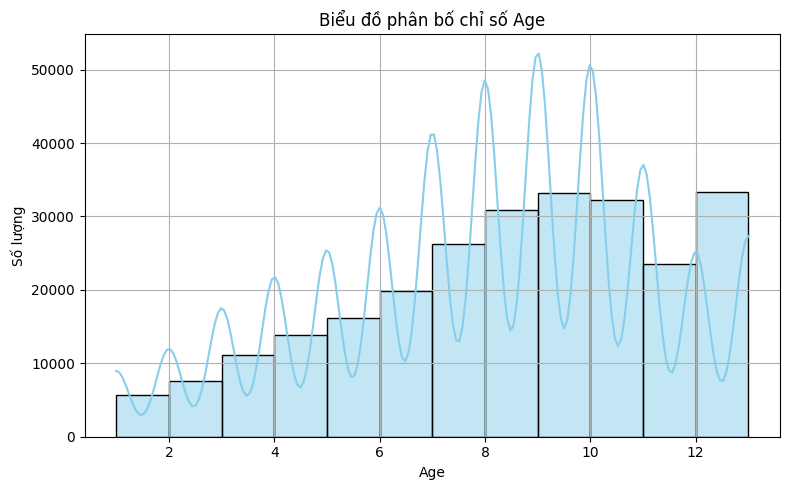

In [250]:
for x in df.columns:
    df[x] = df[x].astype(int)
    target_counts = df[x].value_counts()
    if target_counts.shape[0] > 6:
        min_bmi = int(df[x].min())
        max_bmi = int(df[x].max())
        plt.figure(figsize=(8, 5))
        sns.histplot(df[x], bins=range(min_bmi, max_bmi + 1), kde=True, color='skyblue', edgecolor='black')

        plt.title(f'Biểu đồ phân bố chỉ số {x}')
        plt.xlabel(f'{x}')
        plt.ylabel('Số lượng')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title(f"Phân bố {x} theo nhóm")
        plt.xlabel(f'{x}')
        plt.ylabel("Số lượng")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

HeartDiseaseorAttack    object
HighBP                   int32
HighChol                 int32
CholCheck                int32
BMI                      int32
Smoker                   int32
Stroke                   int32
Diabetes                 int32
PhysActivity             int32
Fruits                   int32
Veggies                  int32
HvyAlcoholConsump        int32
GenHlth                  int32
MentHlth                 int32
PhysHlth                 int32
DiffWalk                 int32
Sex                      int32
Age                      int32
dtype: object


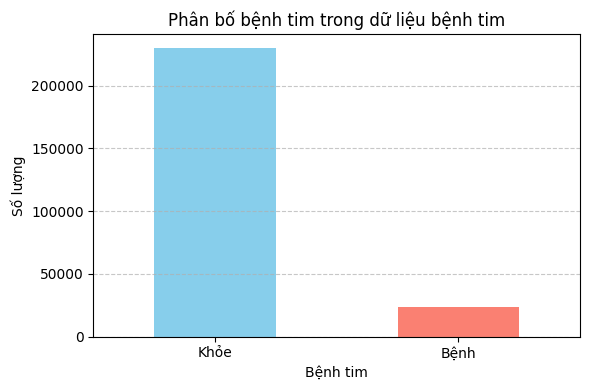

In [251]:
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({1: 'Bệnh', 0: 'Khỏe'})
# df['Sex'] = df['Sex'].map({1: 'Nam', 0: 'Nữ'})
print(df.dtypes)

target_counts = df['HeartDiseaseorAttack'].value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Phân bố bệnh tim trong dữ liệu bệnh tim")
plt.xlabel("Bệnh tim")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Decision tree

In [252]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Nếu cột nào là dạng categorical (ví dụ: sex, cp...), encode nó nếu cần
# Ở đây DecisionTree của sklearn có thể xử lý numeric nên ta có thể giữ nguyên nếu là số
# Nếu muốn rõ ràng hơn: encode cột 'sex' lại
X['Sex'] = X['Sex'].astype(int)  # chắc chắn nó là int

# 🧪 Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Tạo và train mô hình Decision Tree
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model.fit(X_train, y_train)

# 🧠 Dự đoán
y_pred = model.predict(X_test)

# 📊 Đánh giá
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🌲 Vẽ cây quyết định
# plt.figure(figsize=(20,10))
# plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
# plt.title("Cây quyết định dự đoán bệnh tim")
# plt.show()

🎯 Accuracy: 0.9035201829076002
              precision    recall  f1-score   support

        Bệnh       0.45      0.12      0.18      4768
        Khỏe       0.91      0.99      0.95     45968

    accuracy                           0.90     50736
   macro avg       0.68      0.55      0.57     50736
weighted avg       0.87      0.90      0.88     50736



# Navie Bayes

🎯 Accuracy: 0.8239514348785872
              precision    recall  f1-score   support

        Bệnh       0.28      0.54      0.36      4768
        Khỏe       0.95      0.85      0.90     45968

    accuracy                           0.82     50736
   macro avg       0.61      0.70      0.63     50736
weighted avg       0.88      0.82      0.85     50736



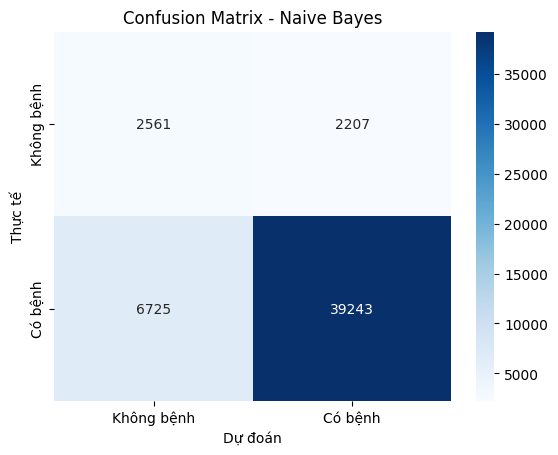

In [253]:
# 🎯 Tách input và output
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# 🧪 Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📦 Khởi tạo và train mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 🧠 Dự đoán
y_pred = nb_model.predict(X_test)
y_prob = model.predict_proba(X_test)
my_y = list(zip(y_pred, map(lambda x: x[0] if x[0]>0.5 else x[1], y_prob)))
# In ra dự đoán và xác suất

# for pred, prob in my_y.:
#     print(f"Dự đoán: {pred}, Xác suất: {prob:.2f}")
# 📊 Đánh giá
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🔥 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()